## Calculating Zonal Statistics of Raster Using Python 3

In [1]:
from matplotlib import pyplot as plt
from rasterio.plot import show_hist
from rasterio.plot import show #To plot raster alone
import geopandas as gpd
import pandas as pd
import rasterstats
import rasterio

## Read the Districts shapefile and Rainfall Tifs from Local Disks

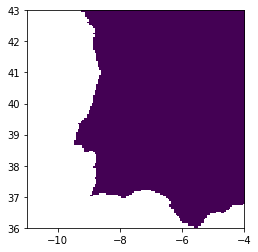

<AxesSubplot:>

In [2]:
# Read the districts shapefile 
districts = gpd.read_file(r'./Districts/districts.shp')

# Read the rainfall raster of 2020-04-15
rf = rasterio.open(r'./Rainfall Data Rasters/2020-4-15.tif', mode = 'r')
rainFall = rasterio.open('Rainfall Data Rasters/2020-4-3.tif', mode='r')
show(rainFall) #This is to plot and show a single Raster as opened above

## Plotting the raster and the districts shapefile together 

In [3]:
"""
Creates a plotting axis and then plots on them
Facecolor(Fill color) = 'None' when ploting .shps to only display bounds
set edge color to sth distinct e.g 'Yellow'
"""
def makePlot():
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
    show(rf, ax = ax1, title = 'Rainfall')
    districts.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
    show_hist(rf, title = 'Histogram', ax = ax2)
    plt.show()
    
    # Assign raster values to a numpy nd array
rainfall_array = rf.read(1)
affine = rf.transform

## Calculating the zonal statistics function

In [4]:
"""Calculating the zonal statistics """
def calcZonalStats():
    avg_rf  = rasterstats.zonal_stats(
        districts, rainfall_array, affine = affine,
                                    stats = ['mean'], 
                                    geojson_out = True)

    # Extracting the average rainfall data from the list
    avg_rainfall = []
    i = 0
    while i < len(avg_rf):
        avg_rainfall.append(avg_rf[i]['properties'])
        i = i + 1 

    # Transfering the infromation from the list to a pandas DataFrame
    avg_rf_portugal = pd.DataFrame(avg_rainfall)
    print(avg_rf_portugal)


### Calling The Plot and Calculate Functions

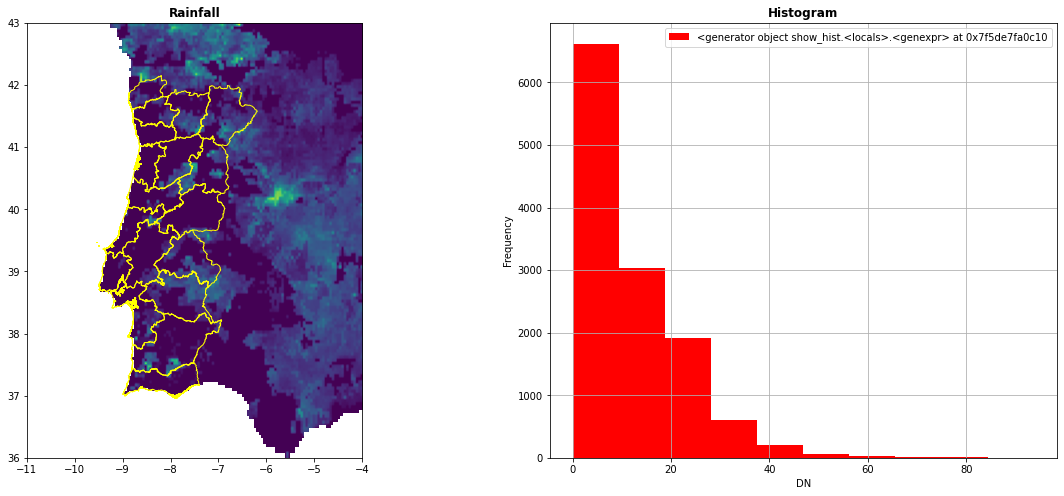

NameError: name 'rainfall_array' is not defined

In [5]:
makePlot()
calcZonalStats()